In [ ]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
import os
from os.path import isfile, join
from os import listdir

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_round = "/content/drive/MyDrive/flatlay_images_neckline/round"
path_scoop = "/content/drive/MyDrive/flatlay_images_neckline/scoop"
path_vneck = "/content/drive/MyDrive/flatlay_images_neckline/v-neck"

In [ ]:
onlyfiles = [ f for f in listdir(path_round) if isfile(join(path_round,f)) ]
round = np.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
    round[n] = cv2.imread( join(path_round,onlyfiles[n]) )

In [ ]:
onlyfiles = [ f for f in listdir(path_scoop) if isfile(join(path_scoop,f)) ]
scoop = np.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
    scoop[n] = cv2.imread( join(path_scoop,onlyfiles[n]) )

In [ ]:
onlyfiles = [ f for f in listdir(path_vneck) if isfile(join(path_vneck,f)) ]
vneck = np.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
    vneck[n] = cv2.imread( join(path_vneck,onlyfiles[n]) )

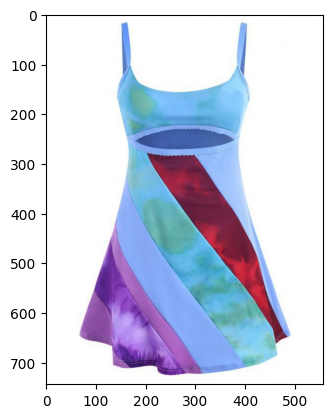

In [ ]:
plt.imshow(cv2.cvtColor(scoop[45], cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
scoop.shape

(966,)

In [ ]:
round.shape

(621,)

In [ ]:
vneck.shape

(1298,)

In [ ]:
scoop_crop = np.empty((len(scoop), 2), dtype=object)
for i in range(0,len(scoop)):
    y = int(scoop[i].shape[1]/2)
    x = int(scoop[i].shape[0]/8)
    w = int(scoop[i].shape[0])-int(scoop[i].shape[0]/8)
    scoop_crop[i] = (scoop[i][0:y, x:w], 'scoop')

In [ ]:
round_crop = np.empty((len(round), 2), dtype=object)
for i in range(0,len(round)):
    y = int(round[i].shape[1]/2)
    x = int(round[i].shape[0]/8)
    w = int(round[i].shape[0])-int(round[i].shape[0]/8)
    round_crop[i] = (round[i][0:y, x:w], 'round')

In [ ]:
vneck_crop = np.empty((len(vneck), 2), dtype=object)
for i in range(0,len(vneck)):
    y = int(vneck[i].shape[1]/2)
    x = int(vneck[i].shape[0]/8)
    w = int(vneck[i].shape[0])-int(vneck[i].shape[0]/8)
    vneck_crop[i] = (vneck[i][0:y, x:w], 'vneck')

In [ ]:
scoop_crop.shape

(966, 2)

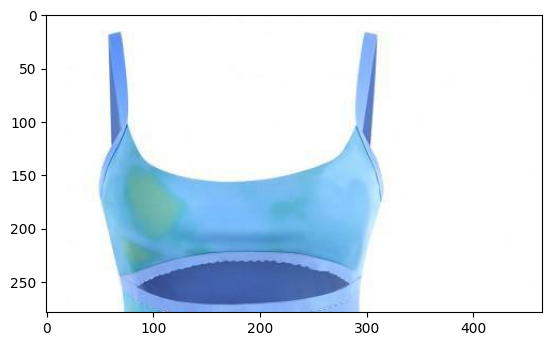

In [ ]:
plt.imshow(cv2.cvtColor(scoop_crop[45,0], cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
cropped = np.empty((0, 2), dtype=object)
cropped.shape

(0, 2)

In [ ]:
cropped = np.append(cropped, scoop_crop, axis = 0)
cropped = np.append(cropped, round_crop, axis = 0)
cropped = np.append(cropped, vneck_crop, axis = 0)
cropped.shape

(2885, 2)

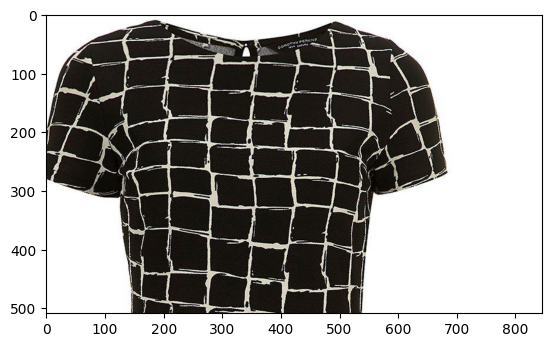

In [ ]:
plt.imshow(cv2.cvtColor(cropped[9,0], cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
np.random.shuffle(cropped)

In [ ]:
cropped[:,1]

array(['vneck', 'vneck', 'vneck', ..., 'scoop', 'round', 'vneck'],
      dtype=object)

In [ ]:
labels = cropped[:, 1]

In [ ]:
cropped.shape

(2885, 2)

In [ ]:
labels

array(['vneck', 'vneck', 'vneck', ..., 'scoop', 'round', 'vneck'],
      dtype=object)

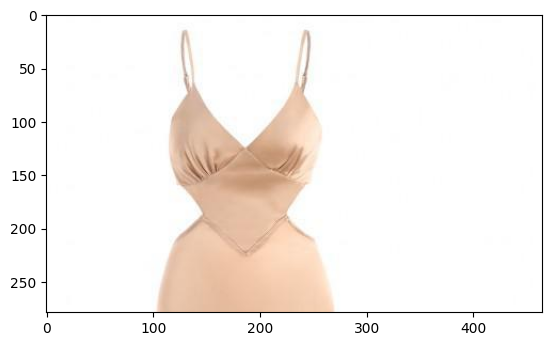

In [ ]:
plt.imshow(cv2.cvtColor(cropped[9,0], cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
values, counts = np.unique(labels, return_counts=True)
print(values, counts)

['round' 'scoop' 'vneck'] [ 621  966 1298]


<BarContainer object of 3 artists>

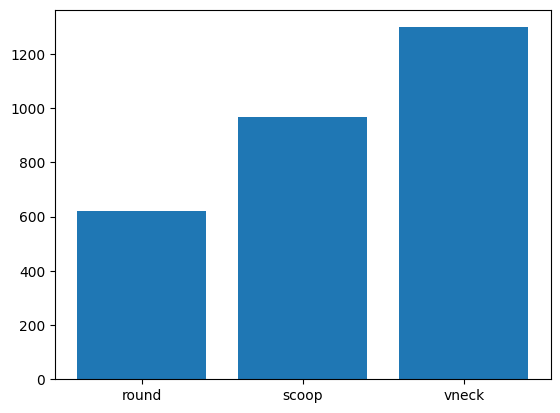

In [ ]:
plt.bar(values, counts)

##Train Test

In [ ]:
images = cropped[:,0]
labels = cropped[:, 1]

In [ ]:
images.shape

(2885,)

In [ ]:
labels.shape

(2885,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.33, random_state=42)

## model setup

In [ ]:
from keras.applications import VGG16

model = VGG16(weights='imagenet', include_top=False, input_shape=(y, w, 3))

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 255, 595, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 255, 595, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 255, 595, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 127, 297, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 127, 297, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 127, 297, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 63, 148, 128)      0     

In [ ]:
for layer in model.layers:
    if len(layer.get_weights()) > 0:
        print(f"\nLayer: {layer.name}")
        weights, biases = layer.get_weights()
        print(weights, biases)


Layer: block1_conv1
[[[[ 4.29470569e-01  1.17273867e-01  3.40129584e-02 ... -1.32241577e-01
    -5.33475243e-02  7.57738389e-03]
   [ 5.50379455e-01  2.08774377e-02  9.88311544e-02 ... -8.48205537e-02
    -5.11389151e-02  3.74943428e-02]
   [ 4.80015397e-01 -1.72696680e-01  3.75577137e-02 ... -1.27135560e-01
    -5.02991639e-02  3.48965675e-02]]

  [[ 3.73466998e-01  1.62062630e-01  1.70863140e-03 ... -1.48207128e-01
    -2.35300660e-01 -6.30356818e-02]
   [ 4.40074533e-01  4.73412387e-02  5.13819456e-02 ... -9.88498852e-02
    -2.96195745e-01 -7.04357103e-02]
   [ 4.08547401e-01 -1.70375049e-01 -4.96297423e-03 ... -1.22360572e-01
    -2.76450396e-01 -3.90796512e-02]]

  [[-6.13601133e-02  1.35693997e-01 -1.15694344e-01 ... -1.40158370e-01
    -3.77666801e-01 -3.00509870e-01]
   [-8.13870355e-02  4.18543853e-02 -1.01763301e-01 ... -9.43124294e-02
    -5.05662560e-01 -3.83694321e-01]
   [-6.51455522e-02 -1.54351532e-01 -1.38038069e-01 ... -1.29404560e-01
    -4.62243795e-01 -3.23985279